In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes.keys()

print(diabetes.feature_names)

diabetes.DESCR

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
df['target']=diabetes.target

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [8]:
df.skew()

age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290664
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291774
s6        0.207917
target    0.440563
dtype: float64

In [9]:
plt.rcParams['figure.figsize']=(10,15)

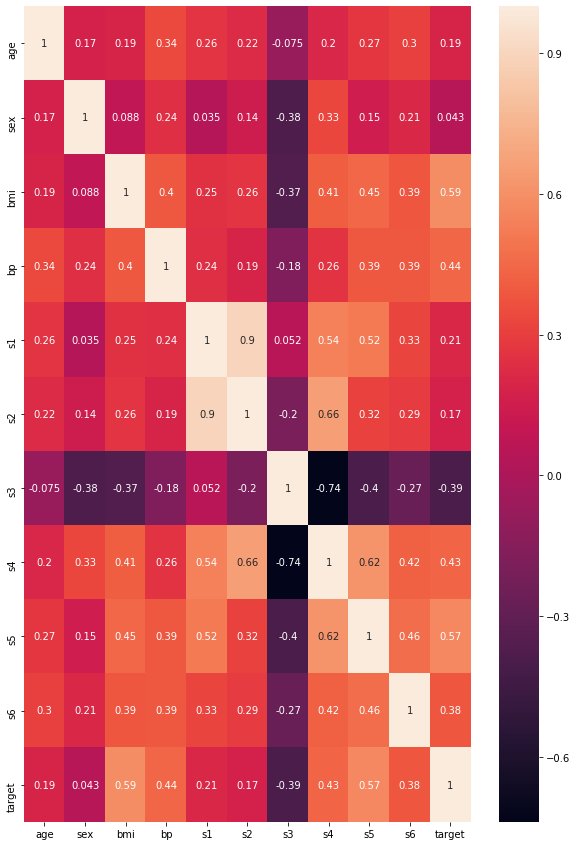

In [10]:
sns.heatmap(df.corr(),annot=True)

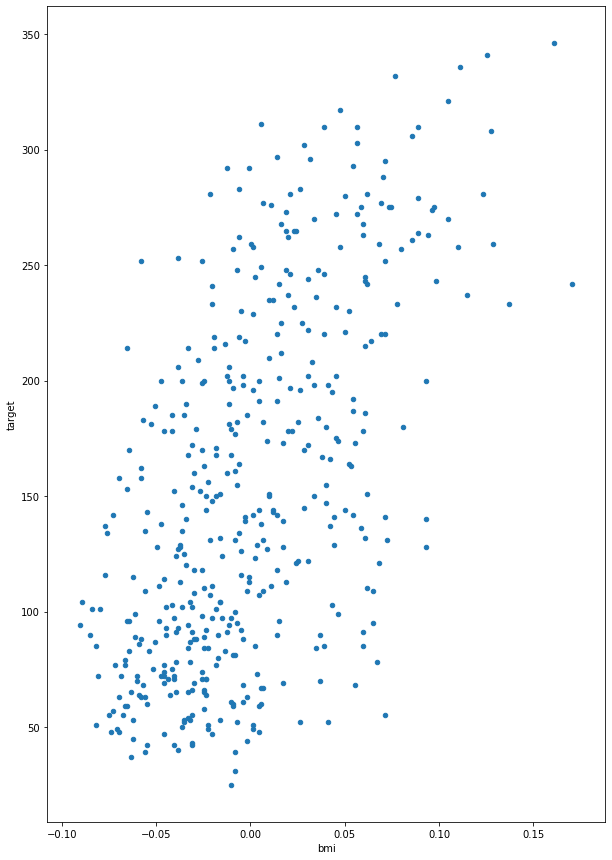

In [11]:
df.plot.scatter('bmi','target')

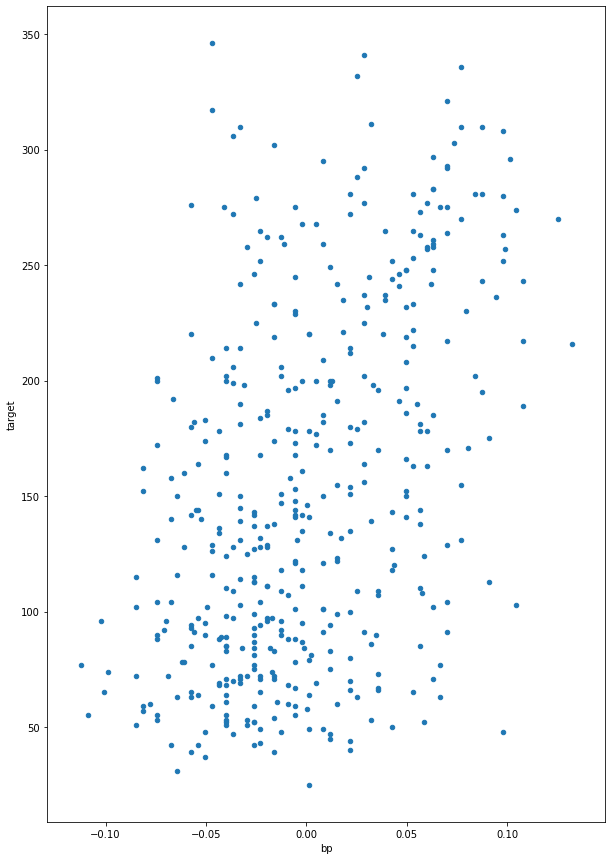

In [12]:
df.plot.scatter('bp','target')

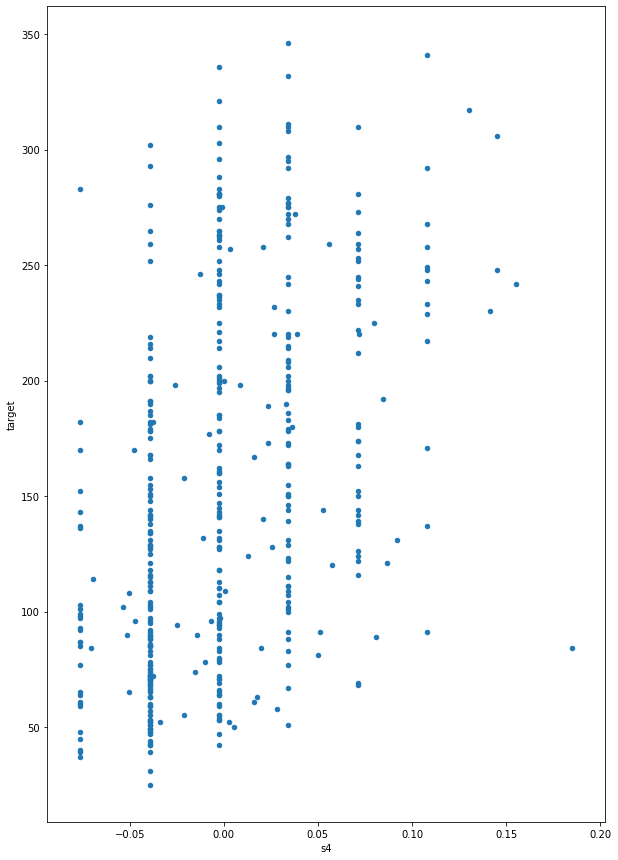

In [13]:
df.plot.scatter('s4','target')

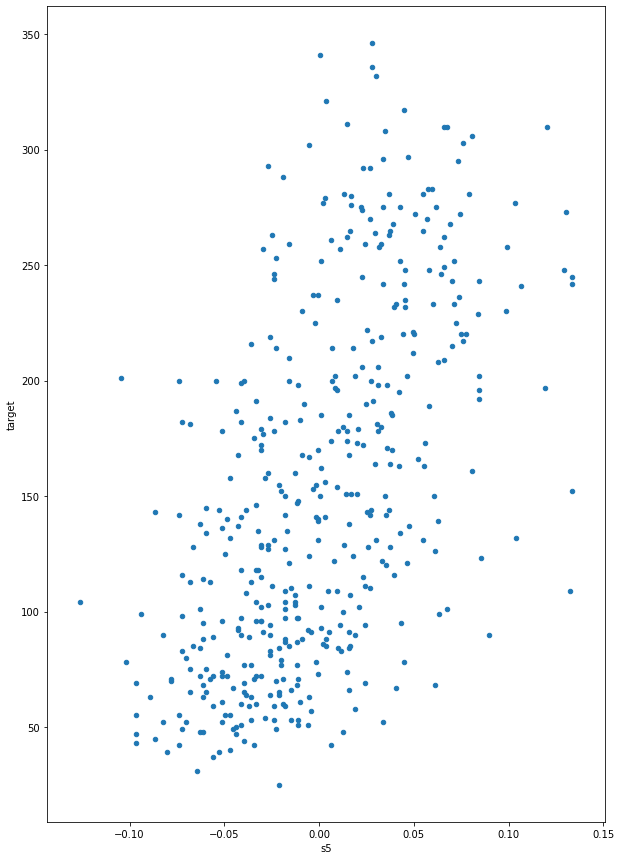

In [14]:
df.plot.scatter('s5','target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFFBD31EF0>,
      dtype=object)

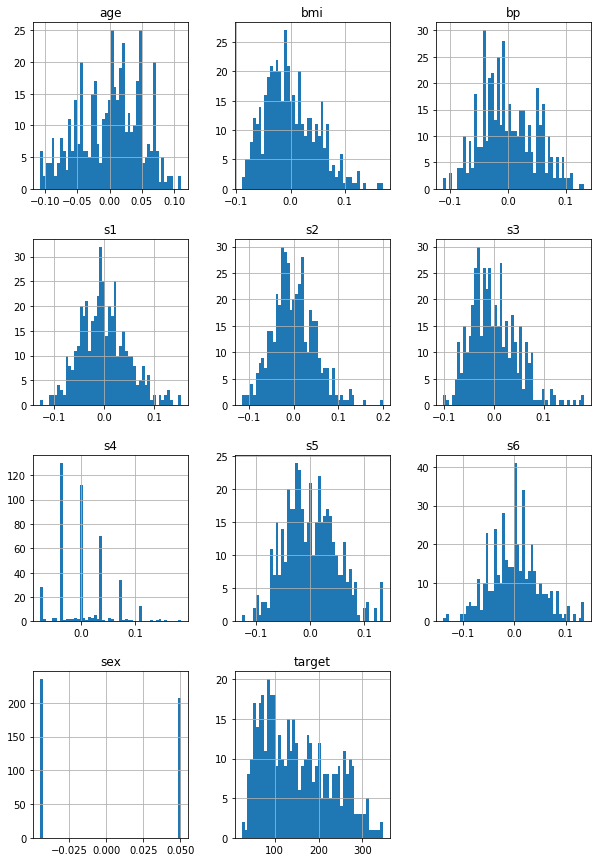

In [15]:
df.hist(bins=50)

In [16]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [17]:
lm=LinearRegression()

In [18]:
x=df.iloc[:,0:-1]

In [19]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33)

In [21]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.score(xtrain,ytrain)

0.46843965741025845

In [23]:
pred=lm.predict(xtest)

In [24]:
r2_score(pred,ytest)

0.22211645590980378

lm.coef_

In [25]:
lm.coef_

array([[  14.74746746, -191.16698398,  469.01171123,  327.06879529,
        -333.97180644,  184.4210474 , -137.59872157,  109.25048206,
         548.23462866,   65.25220666]])

In [26]:
dtr=DecisionTreeRegressor()

In [27]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [28]:
dtr.score(xtrain,ytrain)

1.0

In [29]:
pred_dtr=dtr.predict(xtest)

In [30]:
r2_score(pred_dtr,ytest)

-0.0072210657846143445

In [31]:
cv=cross_val_score(dtr,x,y,cv=10)

In [32]:
cv.mean()

-0.23482881119293886

In [33]:
svm=SVC(kernel='linear')

In [34]:
svm.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
svm.score(xtrain,ytrain)

0.016891891891891893

In [36]:
pred_s=svm.predict(xtest)

In [37]:
r2_score(pred_s,ytest)

0.0

In [38]:
rfr=RandomForestRegressor()

In [39]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
rfr.score(xtrain,ytrain)

0.87998932957716

In [41]:
pred_r=rfr.predict(xtest)

In [42]:
r2_score(pred_r,ytest)

0.10831920391340277

In [43]:
cv=cross_val_score(rfr,x,y,cv=10)

In [44]:
cv.mean()

0.33662632085966493